In [1]:
import pandas as pd

#import data from xlsx file
xls = pd.ExcelFile('imdb.xlsx')
df = xls.parse('imdb')
df_directors = xls.parse('directors')
df_countries = xls.parse('countries')

# merge country data
df = pd.merge(left=df, right=df_countries, 
              how='inner', left_on='country_id', 
              right_on='id')

# merge director data
df = pd.merge(left=df, right=df_directors, 
              how='inner', left_on='director_id', 
              right_on='id')

#fix movie titles
df.movie_title = df.movie_title.str.replace('Ê','')

In [2]:
df.head()

,movie_title,director_id,country_id,content_rating,title_year,imdb_score,gross,duration,id_x,country,id_y,director_name
0,The Shawshank Redemption,34,1,R,1994,9.3,28341469,142,1,USA,34,Frank Darabont
1,The Shawshank Redemption,34,1,R,1994,9.3,28341469,142,1,USA,34,Frank Darabont
2,The Green Mile,34,1,R,1999,8.5,136801374,189,1,USA,34,Frank Darabont
3,The Green Mile,34,1,R,1999,8.5,136801374,189,1,USA,34,Frank Darabont
4,The Godfather,33,1,R,1972,9.2,134821952,175,1,USA,33,Francis Ford Coppola


In [3]:
import matplotlib.pyplot as plt1

# filtered data title_year >= 2000
df_after_2000 = df[df['title_year'] >= 2000]
df_after_2000.head()

,movie_title,director_id,country_id,content_rating,title_year,imdb_score,gross,duration,id_x,country,id_y,director_name
13,The Dark Knight,16,1,PG-13,2008,9.0,533316061,152,1,USA,16,Christopher Nolan
14,The Dark Knight,16,1,PG-13,2008,9.0,533316061,152,1,USA,16,Christopher Nolan
15,The Dark Knight,16,1,PG-13,2008,9.0,533316061,152,1,USA,16,Christopher Nolan
16,The Dark Knight,16,1,PG-13,2008,9.0,533316061,152,1,USA,16,Christopher Nolan
17,The Dark Knight,16,1,PG-13,2008,9.0,533316061,152,1,USA,16,Christopher Nolan


In [4]:
# filtered data title_year < 2000
df_before_2000 = df[df['title_year'] < 2000]
df_before_2000.head()

,movie_title,director_id,country_id,content_rating,title_year,imdb_score,gross,duration,id_x,country,id_y,director_name
0,The Shawshank Redemption,34,1,R,1994,9.3,28341469,142,1,USA,34,Frank Darabont
1,The Shawshank Redemption,34,1,R,1994,9.3,28341469,142,1,USA,34,Frank Darabont
2,The Green Mile,34,1,R,1999,8.5,136801374,189,1,USA,34,Frank Darabont
3,The Green Mile,34,1,R,1999,8.5,136801374,189,1,USA,34,Frank Darabont
4,The Godfather,33,1,R,1972,9.2,134821952,175,1,USA,33,Francis Ford Coppola


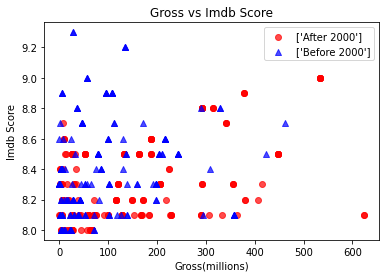

In [5]:
# plot imdb score of movie before and after 2000 vs their gross income

plt1.scatter(
    df_after_2000['gross'].astype(float)/1000000, df_after_2000['imdb_score'],
    marker= 'o',
    color= 'r',
    alpha= 0.7,
    label = ['After 2000']
)

plt1.scatter(
    pd.to_numeric(df_before_2000['gross'])/1000000, df_before_2000['imdb_score'],
    marker= '^',
    color= 'b',
    alpha= 0.7,
    label = ['Before 2000']
)

plt1.legend(loc = 'best')

plt1.xlabel("Gross(millions)")
plt1.ylabel("Imdb Score")

plt1.title('Gross vs Imdb Score')
plt1.show()

In [6]:
# filtered data content_rating: R

df_R = df[df['content_rating'] == 'R']
df_R.head()

,movie_title,director_id,country_id,content_rating,title_year,imdb_score,gross,duration,id_x,country,id_y,director_name
0,The Shawshank Redemption,34,1,R,1994,9.3,28341469,142,1,USA,34,Frank Darabont
1,The Shawshank Redemption,34,1,R,1994,9.3,28341469,142,1,USA,34,Frank Darabont
2,The Green Mile,34,1,R,1999,8.5,136801374,189,1,USA,34,Frank Darabont
3,The Green Mile,34,1,R,1999,8.5,136801374,189,1,USA,34,Frank Darabont
4,The Godfather,33,1,R,1972,9.2,134821952,175,1,USA,33,Francis Ford Coppola


In [7]:
# filtered data content_rating: PG-13

df_PG13 = df[df['content_rating'] == 'PG-13']
df_PG13.head()

,movie_title,director_id,country_id,content_rating,title_year,imdb_score,gross,duration,id_x,country,id_y,director_name
13,The Dark Knight,16,1,PG-13,2008,9.0,533316061,152,1,USA,16,Christopher Nolan
14,The Dark Knight,16,1,PG-13,2008,9.0,533316061,152,1,USA,16,Christopher Nolan
15,The Dark Knight,16,1,PG-13,2008,9.0,533316061,152,1,USA,16,Christopher Nolan
16,The Dark Knight,16,1,PG-13,2008,9.0,533316061,152,1,USA,16,Christopher Nolan
17,The Dark Knight,16,1,PG-13,2008,9.0,533316061,152,1,USA,16,Christopher Nolan


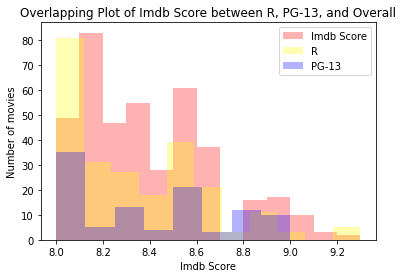

In [8]:
import matplotlib.pyplot as plt2

# plot overall movies vs filtered movies based on their imdb score

plt2.hist(
    df['imdb_score'],
    alpha= 0.3,
    color= 'red',
    label= 'Imdb Score',
    bins = 'auto'
)

plt2.hist(
    df_R['imdb_score'],
    alpha= 0.3,
    color= 'yellow',
    label= 'R',
    bins = 'auto'
)

plt2.hist(
    df_PG13['imdb_score'],
    alpha= 0.3,
    color= 'blue',
    label= 'PG-13',
    bins = 'auto'
)
plt2.legend(loc= 'best')
plt2.xlabel('Imdb Score')
plt2.ylabel('Number of movies')

plt2.title('Overlapping Plot of Imdb Score between R, PG-13, and Overall')
plt2.show()